# Day 13: Mine Cart Madness

In [452]:
import numpy as np

TRACK  = 1
ANGLE1 = 2
ANGLE2 = 3
CROSS  = 4
CART   = 7

tracks = [ "-", "|" ]
carts  = [ ">", "<", "^", "v"]

def getLines(filename):
    with open(filename) as f:
        lines = [ l.strip("\n") for l in f.readlines() ]
        return lines

def getGrid(lines):
    grid = np.zeros((len(lines),len(lines[0])),dtype=int)
    cart = []
    i = 1j # imaginary unit
    # directions as complex number
    dirs = {}
    dirs[">"] = +1
    dirs["<"] = -1
    dirs["^"] = -1j
    dirs["v"] = +1j
    for y in range(len(lines)):
        for x in range(len(lines[0])):
            if lines[y][x] in tracks:
                grid[y][x] = TRACK
            elif lines[y][x] == "\\":
                grid[y][x] = ANGLE1
            elif lines[y][x] == "/":
                grid[y][x] = ANGLE2
            elif lines[y][x] == "+":
                grid[y][x] = CROSS
            elif lines[y][x] in carts:
                grid[y][x] = TRACK
                c = x+i*y
                # saving carts as (X+iY), direction, sense, last turn index
                cart.append((c,c,dirs[lines[y][x]],0))
    return grid,cart

import matplotlib.pyplot as plt

def drawGrid(cart,grid):
    print(cart)
    prev = []
    for c,cold,d,t in cart:
        x = int(c.real)
        y = int(c.imag)
        prev.append(grid[y][x])
        grid[y][x] = CART   
    plt.imshow(grid)
    plt.show()
    for C,p in zip(cart,prev):
        c,cold,d,t = C
        x = int(c.real)
        y = int(c.imag)
        grid[y][x] = p

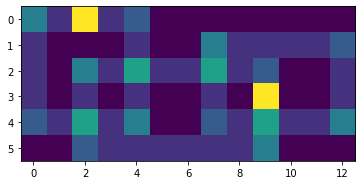

In [429]:
filename = "data/day13test.txt"
grid,cart = getGrid(getLines(filename))
drawGrid(cart,grid)

In [481]:
from collections import Counter

def race(cart,grid,removeCrash=False,verbose=False):

    if verbose:
        drawGrid(cart,grid)

    while True:

        # sort carts according to Y position
        cart = sorted(cart,key=lambda x: int(x[0].imag))
        
        if verbose:
            print("old positions:",cart)

        # move carts
        cartnew = []
        for c,cold,d,t in cart:

            x = int(c.real)
            y = int(c.imag)

            if grid[y][x] == TRACK:
                cnew = c+d
                cold = c
                cartnew.append( (cnew,cold,d,t) )

            elif grid[y][x] == ANGLE1: # \
                if c-cold == +1: # horiz left to righ, turn down
                    cnew = x + (y+1) * 1j
                    d = dirs["v"]
                elif c-cold == -1: # horiz right to left, turn up
                    cnew = x + (y-1) * 1j
                    d = dirs["^"]
                elif c-cold == -1j: # vert down to up, turn toward left
                    cnew = x-1 + y * 1j
                    d = dirs["<"]
                elif c-cold == +1j: # vert up to down, turn toward right
                    cnew = x+1 + y * 1j
                    d = dirs[">"]
                cold = c
                cartnew.append( (cnew,cold,d,t) )
            
            elif grid[y][x] == ANGLE2: # /
                if c-cold == +1: # horiz left to righ, turn up
                    cnew = x + (y-1) * 1j
                    d = dirs["^"]
                elif c-cold == -1: # horiz right to left, turn down
                    cnew = x + (y+1) * 1j
                    d = dirs["v"]
                elif c-cold == -1j: # vert down to up, turn toward right
                    cnew = x+1 + y * 1j
                    d = dirs[">"]
                elif c-cold == +1j: # vert up to down, turn toward left
                    cnew = x-1 + y * 1j
                    d = dirs["<"]
                cold = c
                cartnew.append( (cnew,cold,d,t) )
            
            elif grid[y][x] == CROSS:
                if t==0: # turn left
                    cnew = c-d*1j
                    dnew = d*-1j
                elif t==1: # go straight
                    cnew = c+d
                    dnew = d
                elif t==2: # turn right
                    cnew = c+d*1j
                    dnew = d*1j
                tnew = (t+1)%3
                cold = c
                cartnew.append( (cnew,cold,dnew,tnew) )
                
            # check for collisions after having moved each cart
            counter = Counter([ c for c,cold,d,t in cartnew ])
            if counter.most_common()[0][1]==2: # detected a crash
                if removeCrash==False: # Part 1: stop if collision is detected
                    coll = counter.most_common()[0][0]
                    print("Collision at (X,Y) = ({},{})".format(int(coll.real),int(coll.imag)))
                    return
                else: # Part 2: remove crashed carts
                    crashloc = [ p[0] for p in counter.most_common() if p[1]>=2 ] # crash locations
                    cartnew2 = []
                    for C in cartnew:
                        c,cold,d,t = C
                        if c not in crashloc:
                            cartnew2.append(C)
                    cartnew = cartnew2
            
        cart = cartnew

        if verbose:
            print("new positions:",cart)    
            drawGrid(cart,grid)
            
        if len(cart)==1:
            c,cold,d,t = cart[0]
            print("Survivor cart at (X,Y) = ({},{})".format(int(c.real),int(c.imag)))
            return

In [486]:
filename = "data/day13test1.txt"
grid,cart = getGrid(getLines(filename))
race(cart,grid,verbose=False)

Collision at (X,Y) = (7,3)


In [487]:
filename = "data/input13.txt"
grid,cart = getGrid(getLines(filename))
race(cart,grid,verbose=False)

Collision at (X,Y) = (38,57)


[((1+0j), (1+0j), 1, 0), ((3+0j), (3+0j), -1, 0), ((3+2j), (3+2j), -1, 0), ((6+3j), (6+3j), 1j, 0), ((1+4j), (1+4j), 1, 0), ((3+4j), (3+4j), -1, 0), ((6+5j), (6+5j), (-0-1j), 0), ((3+6j), (3+6j), -1, 0), ((5+6j), (5+6j), 1, 0)]


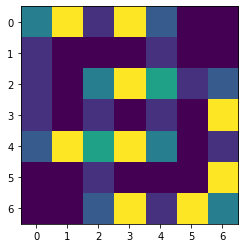

old positions: [((1+0j), (1+0j), 1, 0), ((3+0j), (3+0j), -1, 0), ((3+2j), (3+2j), -1, 0), ((6+3j), (6+3j), 1j, 0), ((1+4j), (1+4j), 1, 0), ((3+4j), (3+4j), -1, 0), ((6+5j), (6+5j), (-0-1j), 0), ((3+6j), (3+6j), -1, 0), ((5+6j), (5+6j), 1, 0)]
new positions: [((2+2j), (3+2j), -1, 0), ((2+6j), (3+6j), -1, 0), ((6+6j), (5+6j), 1, 0)]
[((2+2j), (3+2j), -1, 0), ((2+6j), (3+6j), -1, 0), ((6+6j), (5+6j), 1, 0)]


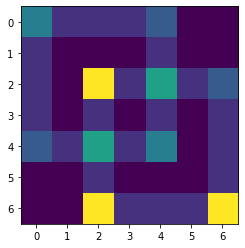

old positions: [((2+2j), (3+2j), -1, 0), ((2+6j), (3+6j), -1, 0), ((6+6j), (5+6j), 1, 0)]
new positions: [((2+3j), (2+2j), 1j, 0), ((2+5j), (2+6j), (-0-1j), 0), ((6+5j), (6+6j), (-0-1j), 0)]
[((2+3j), (2+2j), 1j, 0), ((2+5j), (2+6j), (-0-1j), 0), ((6+5j), (6+6j), (-0-1j), 0)]


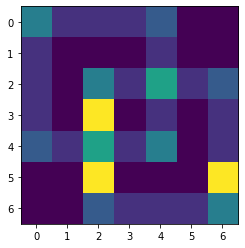

old positions: [((2+3j), (2+2j), 1j, 0), ((2+5j), (2+6j), (-0-1j), 0), ((6+5j), (6+6j), (-0-1j), 0)]
new positions: [((6+4j), (6+5j), (-0-1j), 0)]
[((6+4j), (6+5j), (-0-1j), 0)]


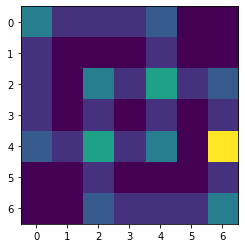

Survivor cart at (X,Y) = (6,4)


In [488]:
filename = "data/day13test2.txt"
grid,cart = getGrid(getLines(filename))
race(cart,grid,removeCrash=True,verbose=True)

In [485]:
filename = "data/input13.txt"

grid,cart = getGrid(getLines(filename))

race(cart,grid,removeCrash=True,verbose=False)

Survivor cart at (X,Y) = (74,114)
